(0.0, 8.0)

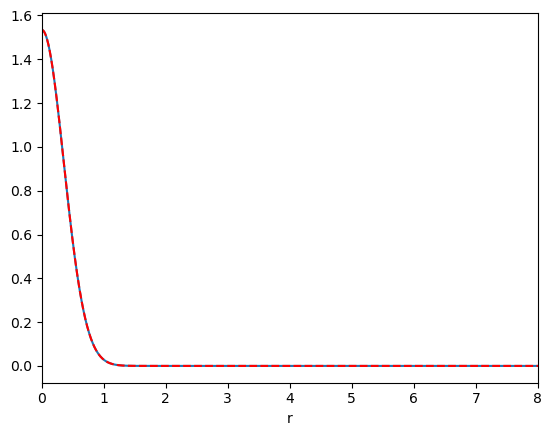

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

N = 500                                           # Truncation ordem

L0 = 3                                             # Map parameter 

col1 = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # Collocation points w origin included - CGL - Grid 1
col2 = np.cos((2*(np.arange(2*N + 3))+1)*math.pi /(2*(2*N + 2)+2))      # Collocation points w origin not included - CG - Grid 2 (Verificado)      


colr1 = col1[1:N+2]             
colr2 = col2[0:N+1] 

# Physical domain  

r_2 = L0 * colr2/(np.sqrt(1-colr2**2))                    
r1 = L0 * colr1/(np.sqrt(1-colr1**2))                    

r = np.flip(r1)     # rearrange the points in a crescent order                                       
r2 = np.flip(r_2)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Rational Tchebyshev Polinomials SB_2n): 

# Grid 1 (CGL):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     

# Base function in Grid 1:

psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]


# Grid 2 (CG):

SB_2 = np.zeros([N+2,N+1])
rSB_2 = np.zeros([N+2,N+1])
rrSB_2 = np.zeros([N+2,N+1])

for i in range(N+1+1):                                    # SB2[:,0] = function not in origin
  SB_2[i,] = np.sin((2*i+1)*np.arctan(L0/r2))                                                  

for i in range(N+1+1):
  rSB_2[i,] = -np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**2*(1+L0**2/r2**2)) 

for i in range(N+1+1):
  rrSB_2[i,] = -np.sin((2*i+1)*np.arctan(L0/r2))*(2*i+1)**2*L0**2/(r2**4*(1+L0**2/r2**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**3*(1+L0**2/r2**2))-2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0**3/(r2**5*(1+L0**2/r2**2)**2)                     

# Base function in Grid 2:

psi_2 = SB_2[0:N+1,:]        # origin not included in psi2[:,0]
rpsi_2 = rSB_2[0:N+1,:]
rrpsi_2 = rrSB_2[0:N+1,:]
        

# Initial conditions of Phi (Scalar field):                                    

r0 = 0

A0 = 0.76702         # 0.767 -> Disperse;  #    0.76705   -> AH      (Scalar field amplitude)

sigma = 1/2


Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))      # Phi initial data w/ origin included (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

# Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)

#plt.show()


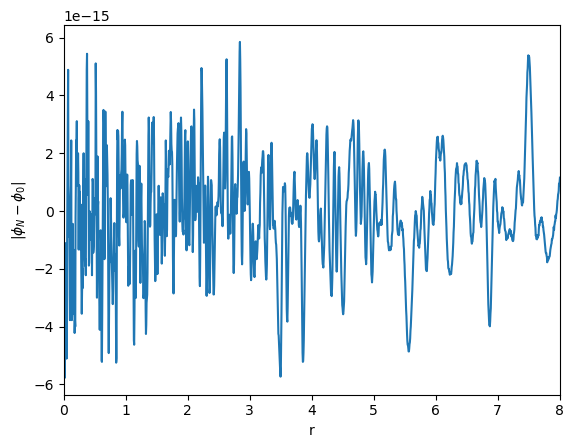

In [2]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [3]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr 

tol = 1e-19
n = 0
nf = 100

# Newton Raphson loop

while n <= nf:
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1]  
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1


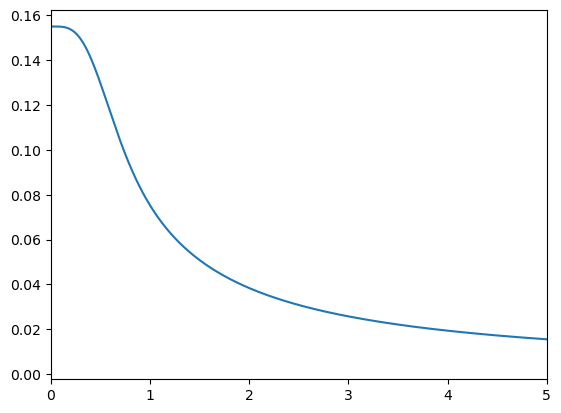

In [4]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [5]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# Grid 1: 

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])

# Grid 2: 

SB1_2 = 1/2*(SB_2[1:(N+2),:] + SB_2[0:(N+1),:])          # VERIFICADO
rSB1_2 = 1/2*(rSB_2[1:(N+2),:] + rSB_2[0:(N+1),:])
rrSB1_2 = 1/2*(rrSB_2[1:(N+2),:] + rrSB_2[0:(N+1),:])




# Base functions for Beta

# Grid 1

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])



for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)


# Grid 2

SB2_2 = np.zeros([N+1,N+1])      
rSB2_2 = np.zeros([N+1,N+1])
rrSB2_2 = np.zeros([N+1,N+1])



for i in range(N+1):                                                   # VERIFICADO
  SB2_2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r2))                                                  


for i in range(N+1):
  rSB2_2[i,] = -np.cos((2*i+2)*np.arctan(L0/r2))*(2*i+2)*L0/(r2**2*(1+L0**2/r2**2))


for i in range(N+1):
  rrSB2_2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [6]:
np.shape(SB1)

(501, 501)

In [7]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qSB[1:(N+2),:] + qrrSB[0:(N+1),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [8]:
# Filtering

Nc = 200

Nf = N - Nc

coef_f = 36
s = 20

#filter1 = np.ones(N+1)
#filter2 = np.ones(N)
filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
filter2 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc))/(N-Nc))**s)))

In [ ]:
# Runge Kutta 4th order
import time

init = time.time()

h = 0.0002   # step size
tf = 4

It = int(tf/h)

t = 0

Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)

  Pi = np.dot(b0, psi)   
  rPi= np.dot(b0, rpsi)
    
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi) 

  Phi_2 = np.dot(a0, psi_2)
  rPhi_2 = np.dot(a0, rpsi_2)  
  
  Pi_2 = np.dot(b0, psi_2)  
    
  Chi_2 = np.dot(c0, psi_2)
  rChi_2 = np.dot(c0, rpsi_2)  
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(phi_0))
  out_p.write(',\n')
    
  # Second step
  Phi = np.dot(a0 + L1, psi)      
  rPhi = np.dot(a0 + L1, rpsi)
  rrPhi = np.dot(a0 + L1, rrpsi)

  Pi = np.dot(b0 + N1, psi)   
  rPi= np.dot(b0 + N1, rpsi)
    
  Chi = np.dot(c0 + K1, psi) 
  rChi = np.dot(c0 + K1, rpsi)
  rrChi = np.dot(c0 + K1, rrpsi) 

  Phi_2 = np.dot(a0 + L1, psi_2)
  rPhi_2 = np.dot(a0 + L1, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N1, psi_2)  
    
  Chi_2 = np.dot(c0 + K1, psi_2)
  rChi_2 = np.dot(c0 + K1, rpsi_2)  
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)

    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
    
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
    
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)

  Phi_2 = np.dot(a0 + L2/2, psi_2)
  rPhi_2 = np.dot(a0 + L2/2, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N2/2, psi_2)  
    
  Chi_2 = np.dot(c0 + K2/2, psi_2)
  rChi_2 = np.dot(c0 + K2/2, rpsi_2)

 
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)
    
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step  
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi)
    
  Pi = np.dot(filter1*b0 + N3, psi)
  rPi= np.dot(filter1*b0 + N3, rpsi)
    
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)

  Phi_2 = np.dot(a0 + L3, psi_2)
  rPhi_2 = np.dot(a0 + L3, rpsi_2)  
  
  Pi_2 = np.dot(filter1*b0 + N3, psi_2)  
    
  Chi_2 = np.dot(c0 + K3, psi_2)
  rChi_2 = np.dot(c0 + K3, rpsi_2)


  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)
    
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  
  print(t) 
#  if t > 9:
#    h=0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

out_a.close()
out_p.close()   
    
fim = time.time()    

tex = (fim - init)/60

t1 = np.linspace(0, tf, len(Alpha_origin)) 

0.0002
0.0004
0.0006000000000000001
0.0008
0.001
0.0012000000000000001
0.0014000000000000002
0.0016000000000000003
0.0018000000000000004
0.0020000000000000005
0.0022000000000000006
0.0024000000000000007
0.0026000000000000007
0.002800000000000001
0.003000000000000001
0.003200000000000001
0.003400000000000001
0.003600000000000001
0.0038000000000000013
0.004000000000000001
0.004200000000000001
0.0044
0.0046
0.0048
0.004999999999999999
0.005199999999999999
0.0053999999999999986
0.005599999999999998
0.005799999999999998
0.0059999999999999975
0.006199999999999997
0.006399999999999997
0.0065999999999999965
0.006799999999999996
0.006999999999999996
0.0071999999999999955
0.007399999999999995
0.007599999999999995
0.0077999999999999944
0.007999999999999995
0.008199999999999995
0.008399999999999996
0.008599999999999997
0.008799999999999997
0.008999999999999998
0.009199999999999998
0.009399999999999999
0.0096
0.0098
0.01
0.0102
0.010400000000000001
0.010600000000000002
0.010800000000000002
0.011000

0.08320000000000033
0.08340000000000033
0.08360000000000034
0.08380000000000035
0.08400000000000035
0.08420000000000036
0.08440000000000036
0.08460000000000037
0.08480000000000038
0.08500000000000038
0.08520000000000039
0.08540000000000039
0.0856000000000004
0.0858000000000004
0.08600000000000041
0.08620000000000042
0.08640000000000042
0.08660000000000043
0.08680000000000043
0.08700000000000044
0.08720000000000044
0.08740000000000045
0.08760000000000046
0.08780000000000046
0.08800000000000047
0.08820000000000047
0.08840000000000048
0.08860000000000048
0.08880000000000049
0.0890000000000005
0.0892000000000005
0.0894000000000005
0.08960000000000051
0.08980000000000052
0.09000000000000052
0.09020000000000053
0.09040000000000054
0.09060000000000054
0.09080000000000055
0.09100000000000055
0.09120000000000056
0.09140000000000056
0.09160000000000057
0.09180000000000058
0.09200000000000058
0.09220000000000059
0.09240000000000059
0.0926000000000006
0.0928000000000006
0.09300000000000061
0.09320

0.16660000000000272
0.16680000000000272
0.16700000000000273
0.16720000000000274
0.16740000000000274
0.16760000000000275
0.16780000000000275
0.16800000000000276
0.16820000000000276
0.16840000000000277
0.16860000000000278
0.16880000000000278
0.1690000000000028
0.1692000000000028
0.1694000000000028
0.1696000000000028
0.1698000000000028
0.17000000000000282
0.17020000000000282
0.17040000000000283
0.17060000000000283
0.17080000000000284
0.17100000000000284
0.17120000000000285
0.17140000000000286
0.17160000000000286
0.17180000000000287
0.17200000000000287
0.17220000000000288
0.17240000000000288
0.1726000000000029
0.1728000000000029
0.1730000000000029
0.1732000000000029
0.1734000000000029
0.17360000000000292
0.17380000000000292
0.17400000000000293
0.17420000000000294
0.17440000000000294
0.17460000000000295
0.17480000000000295
0.17500000000000296
0.17520000000000296
0.17540000000000297
0.17560000000000298
0.17580000000000298
0.176000000000003
0.176200000000003
0.176400000000003
0.17660000000000

0.2500000000000051
0.2502000000000051
0.25040000000000506
0.25060000000000504
0.250800000000005
0.251000000000005
0.251200000000005
0.25140000000000495
0.25160000000000493
0.2518000000000049
0.2520000000000049
0.25220000000000486
0.25240000000000484
0.2526000000000048
0.2528000000000048
0.2530000000000048
0.25320000000000475
0.25340000000000473
0.2536000000000047
0.2538000000000047
0.25400000000000467
0.25420000000000464
0.2544000000000046
0.2546000000000046
0.2548000000000046
0.25500000000000456
0.25520000000000453
0.2554000000000045
0.2556000000000045
0.25580000000000447
0.25600000000000445
0.2562000000000044
0.2564000000000044
0.2566000000000044
0.25680000000000436
0.25700000000000434
0.2572000000000043
0.2574000000000043
0.25760000000000427
0.25780000000000425
0.2580000000000042
0.2582000000000042
0.2584000000000042
0.25860000000000416
0.25880000000000414
0.2590000000000041
0.2592000000000041
0.25940000000000407
0.25960000000000405
0.259800000000004
0.260000000000004
0.260200000000

0.33499999999999575
0.3351999999999957
0.3353999999999957
0.3355999999999957
0.33579999999999566
0.33599999999999564
0.3361999999999956
0.3363999999999956
0.33659999999999557
0.33679999999999555
0.3369999999999955
0.3371999999999955
0.3373999999999955
0.33759999999999546
0.33779999999999544
0.3379999999999954
0.3381999999999954
0.33839999999999537
0.33859999999999535
0.3387999999999953
0.3389999999999953
0.3391999999999953
0.33939999999999526
0.33959999999999524
0.3397999999999952
0.3399999999999952
0.3401999999999952
0.34039999999999515
0.34059999999999513
0.3407999999999951
0.3409999999999951
0.34119999999999506
0.34139999999999504
0.341599999999995
0.341799999999995
0.341999999999995
0.34219999999999495
0.34239999999999493
0.3425999999999949
0.3427999999999949
0.34299999999999486
0.34319999999999484
0.3433999999999948
0.3435999999999948
0.3437999999999948
0.34399999999999475
0.34419999999999473
0.3443999999999947
0.3445999999999947
0.34479999999999467
0.34499999999999464
0.345199999

0.4199999999999864
0.42019999999998636
0.42039999999998634
0.4205999999999863
0.4207999999999863
0.4209999999999863
0.42119999999998625
0.42139999999998623
0.4215999999999862
0.4217999999999862
0.42199999999998616
0.42219999999998614
0.4223999999999861
0.4225999999999861
0.4227999999999861
0.42299999999998605
0.42319999999998603
0.423399999999986
0.423599999999986
0.42379999999998597
0.42399999999998594
0.4241999999999859
0.4243999999999859
0.4245999999999859
0.42479999999998586
0.42499999999998583
0.4251999999999858
0.4253999999999858
0.42559999999998577
0.42579999999998575
0.4259999999999857
0.4261999999999857
0.4263999999999857
0.42659999999998566
0.42679999999998564
0.4269999999999856
0.4271999999999856
0.42739999999998557
0.42759999999998555
0.4277999999999855
0.4279999999999855
0.4281999999999855
0.42839999999998546
0.42859999999998544
0.4287999999999854
0.4289999999999854
0.42919999999998537
0.42939999999998535
0.4295999999999853
0.4297999999999853
0.4299999999999853
0.430199999

0.504999999999977
0.505199999999977
0.505399999999977
0.505599999999977
0.5057999999999769
0.5059999999999769
0.5061999999999769
0.5063999999999769
0.5065999999999768
0.5067999999999768
0.5069999999999768
0.5071999999999768
0.5073999999999768
0.5075999999999767
0.5077999999999767
0.5079999999999767
0.5081999999999767
0.5083999999999766
0.5085999999999766
0.5087999999999766
0.5089999999999766
0.5091999999999766
0.5093999999999765
0.5095999999999765
0.5097999999999765
0.5099999999999765
0.5101999999999765
0.5103999999999764
0.5105999999999764
0.5107999999999764
0.5109999999999764
0.5111999999999763
0.5113999999999763
0.5115999999999763
0.5117999999999763
0.5119999999999763
0.5121999999999762
0.5123999999999762
0.5125999999999762
0.5127999999999762
0.5129999999999761
0.5131999999999761
0.5133999999999761
0.5135999999999761
0.513799999999976
0.513999999999976
0.514199999999976
0.514399999999976
0.514599999999976
0.5147999999999759
0.5149999999999759
0.5151999999999759
0.5153999999999759
0.

0.5923999999999674
0.5925999999999674
0.5927999999999674
0.5929999999999673
0.5931999999999673
0.5933999999999673
0.5935999999999673
0.5937999999999672
0.5939999999999672
0.5941999999999672
0.5943999999999672
0.5945999999999672
0.5947999999999671
0.5949999999999671
0.5951999999999671
0.5953999999999671
0.595599999999967
0.595799999999967
0.595999999999967
0.596199999999967
0.596399999999967
0.5965999999999669
0.5967999999999669
0.5969999999999669
0.5971999999999669
0.5973999999999668
0.5975999999999668
0.5977999999999668
0.5979999999999668
0.5981999999999668
0.5983999999999667
0.5985999999999667
0.5987999999999667
0.5989999999999667
0.5991999999999666
0.5993999999999666
0.5995999999999666
0.5997999999999666
0.5999999999999666
0.6001999999999665
0.6003999999999665
0.6005999999999665
0.6007999999999665
0.6009999999999664
0.6011999999999664
0.6013999999999664
0.6015999999999664
0.6017999999999664
0.6019999999999663
0.6021999999999663
0.6023999999999663
0.6025999999999663
0.602799999999966

0.6795999999999578
0.6797999999999578
0.6799999999999577
0.6801999999999577
0.6803999999999577
0.6805999999999577
0.6807999999999577
0.6809999999999576
0.6811999999999576
0.6813999999999576
0.6815999999999576
0.6817999999999576
0.6819999999999575
0.6821999999999575
0.6823999999999575
0.6825999999999575
0.6827999999999574
0.6829999999999574
0.6831999999999574
0.6833999999999574
0.6835999999999574
0.6837999999999573
0.6839999999999573
0.6841999999999573
0.6843999999999573
0.6845999999999572
0.6847999999999572
0.6849999999999572
0.6851999999999572
0.6853999999999572
0.6855999999999571
0.6857999999999571
0.6859999999999571
0.6861999999999571
0.686399999999957
0.686599999999957
0.686799999999957
0.686999999999957
0.687199999999957
0.6873999999999569
0.6875999999999569
0.6877999999999569
0.6879999999999569
0.6881999999999568
0.6883999999999568
0.6885999999999568
0.6887999999999568
0.6889999999999568
0.6891999999999567
0.6893999999999567
0.6895999999999567
0.6897999999999567
0.689999999999956

0.7667999999999482
0.7669999999999482
0.7671999999999481
0.7673999999999481
0.7675999999999481
0.7677999999999481
0.7679999999999481
0.768199999999948
0.768399999999948
0.768599999999948
0.768799999999948
0.768999999999948
0.7691999999999479
0.7693999999999479
0.7695999999999479
0.7697999999999479
0.7699999999999478
0.7701999999999478
0.7703999999999478
0.7705999999999478
0.7707999999999477
0.7709999999999477
0.7711999999999477
0.7713999999999477
0.7715999999999477
0.7717999999999476
0.7719999999999476
0.7721999999999476
0.7723999999999476
0.7725999999999476
0.7727999999999475
0.7729999999999475
0.7731999999999475
0.7733999999999475
0.7735999999999474
0.7737999999999474
0.7739999999999474
0.7741999999999474
0.7743999999999474
0.7745999999999473
0.7747999999999473
0.7749999999999473
0.7751999999999473
0.7753999999999472
0.7755999999999472
0.7757999999999472
0.7759999999999472
0.7761999999999472
0.7763999999999471
0.7765999999999471
0.7767999999999471
0.7769999999999471
0.777199999999947

0.8541999999999386
0.8543999999999385
0.8545999999999385
0.8547999999999385
0.8549999999999385
0.8551999999999385
0.8553999999999384
0.8555999999999384
0.8557999999999384
0.8559999999999384
0.8561999999999383
0.8563999999999383
0.8565999999999383
0.8567999999999383
0.8569999999999383
0.8571999999999382
0.8573999999999382
0.8575999999999382
0.8577999999999382
0.8579999999999381
0.8581999999999381
0.8583999999999381
0.8585999999999381
0.8587999999999381
0.858999999999938
0.859199999999938
0.859399999999938
0.859599999999938
0.859799999999938
0.8599999999999379
0.8601999999999379
0.8603999999999379
0.8605999999999379
0.8607999999999378
0.8609999999999378
0.8611999999999378
0.8613999999999378
0.8615999999999377
0.8617999999999377
0.8619999999999377
0.8621999999999377
0.8623999999999377
0.8625999999999376
0.8627999999999376
0.8629999999999376
0.8631999999999376
0.8633999999999376
0.8635999999999375
0.8637999999999375
0.8639999999999375
0.8641999999999375
0.8643999999999374
0.864599999999937

0.940999999999929
0.941199999999929
0.941399999999929
0.9415999999999289
0.9417999999999289
0.9419999999999289
0.9421999999999289
0.9423999999999289
0.9425999999999288
0.9427999999999288
0.9429999999999288
0.9431999999999288
0.9433999999999287
0.9435999999999287
0.9437999999999287
0.9439999999999287
0.9441999999999287
0.9443999999999286
0.9445999999999286
0.9447999999999286
0.9449999999999286
0.9451999999999285
0.9453999999999285
0.9455999999999285
0.9457999999999285
0.9459999999999285
0.9461999999999284
0.9463999999999284
0.9465999999999284
0.9467999999999284
0.9469999999999283
0.9471999999999283
0.9473999999999283
0.9475999999999283
0.9477999999999283
0.9479999999999282
0.9481999999999282
0.9483999999999282
0.9485999999999282
0.9487999999999281
0.9489999999999281
0.9491999999999281
0.9493999999999281
0.9495999999999281
0.949799999999928
0.949999999999928
0.950199999999928
0.950399999999928
0.950599999999928
0.9507999999999279
0.9509999999999279
0.9511999999999279
0.9513999999999279
0

1.0285999999999194
1.0287999999999193
1.0289999999999193
1.0291999999999193
1.0293999999999193
1.0295999999999192
1.0297999999999192
1.0299999999999192
1.0301999999999192
1.0303999999999192
1.0305999999999191
1.0307999999999191
1.030999999999919
1.031199999999919
1.031399999999919
1.031599999999919
1.031799999999919
1.031999999999919
1.032199999999919
1.032399999999919
1.032599999999919
1.032799999999919
1.0329999999999189
1.0331999999999188
1.0333999999999188
1.0335999999999188
1.0337999999999188
1.0339999999999188
1.0341999999999187
1.0343999999999187
1.0345999999999187
1.0347999999999187
1.0349999999999187
1.0351999999999186
1.0353999999999186
1.0355999999999186
1.0357999999999186
1.0359999999999185
1.0361999999999185
1.0363999999999185
1.0365999999999185
1.0367999999999185
1.0369999999999184
1.0371999999999184
1.0373999999999184
1.0375999999999184
1.0377999999999183
1.0379999999999183
1.0381999999999183
1.0383999999999183
1.0385999999999183
1.0387999999999182
1.0389999999999182
1.0

1.1161999999999097
1.1163999999999097
1.1165999999999097
1.1167999999999096
1.1169999999999096
1.1171999999999096
1.1173999999999096
1.1175999999999096
1.1177999999999095
1.1179999999999095
1.1181999999999095
1.1183999999999095
1.1185999999999094
1.1187999999999094
1.1189999999999094
1.1191999999999094
1.1193999999999094
1.1195999999999093
1.1197999999999093
1.1199999999999093
1.1201999999999093
1.1203999999999092
1.1205999999999092
1.1207999999999092
1.1209999999999092
1.1211999999999092
1.1213999999999091
1.1215999999999091
1.121799999999909
1.121999999999909
1.122199999999909
1.122399999999909
1.122599999999909
1.122799999999909
1.122999999999909
1.123199999999909
1.123399999999909
1.123599999999909
1.1237999999999089
1.1239999999999088
1.1241999999999088
1.1243999999999088
1.1245999999999088
1.1247999999999088
1.1249999999999087
1.1251999999999087
1.1253999999999087
1.1255999999999087
1.1257999999999087
1.1259999999999086
1.1261999999999086
1.1263999999999086
1.1265999999999086
1.1

1.2037999999999
1.2039999999999
1.2041999999999
1.2043999999999
1.2045999999999
1.2047999999999
1.2049999999999
1.2051999999999
1.2053999999998999
1.2055999999998999
1.2057999999998998
1.2059999999998998
1.2061999999998998
1.2063999999998998
1.2065999999998998
1.2067999999998997
1.2069999999998997
1.2071999999998997
1.2073999999998997
1.2075999999998996
1.2077999999998996
1.2079999999998996
1.2081999999998996
1.2083999999998996
1.2085999999998995
1.2087999999998995
1.2089999999998995
1.2091999999998995
1.2093999999998994
1.2095999999998994
1.2097999999998994
1.2099999999998994
1.2101999999998994
1.2103999999998993
1.2105999999998993
1.2107999999998993
1.2109999999998993
1.2111999999998992
1.2113999999998992
1.2115999999998992
1.2117999999998992
1.2119999999998992
1.2121999999998991
1.2123999999998991
1.212599999999899
1.212799999999899
1.212999999999899
1.213199999999899
1.213399999999899
1.213599999999899
1.213799999999899
1.213999999999899
1.214199999999899
1.214399999999899
1.214599

1.2915999999998904
1.2917999999998904
1.2919999999998903
1.2921999999998903
1.2923999999998903
1.2925999999998903
1.2927999999998903
1.2929999999998902
1.2931999999998902
1.2933999999998902
1.2935999999998902
1.2937999999998901
1.2939999999998901
1.29419999999989
1.29439999999989
1.29459999999989
1.29479999999989
1.29499999999989
1.29519999999989
1.29539999999989
1.29559999999989
1.29579999999989
1.29599999999989
1.2961999999998899
1.2963999999998899
1.2965999999998898
1.2967999999998898
1.2969999999998898
1.2971999999998898
1.2973999999998898
1.2975999999998897
1.2977999999998897
1.2979999999998897
1.2981999999998897
1.2983999999998896
1.2985999999998896
1.2987999999998896
1.2989999999998896
1.2991999999998896
1.2993999999998895
1.2995999999998895
1.2997999999998895
1.2999999999998895
1.3001999999998894
1.3003999999998894
1.3005999999998894
1.3007999999998894
1.3009999999998894
1.3011999999998893
1.3013999999998893
1.3015999999998893
1.3017999999998893
1.3019999999998892
1.30219999999

1.3791999999998807
1.3793999999998807
1.3795999999998807
1.3797999999998807
1.3799999999998807
1.3801999999998806
1.3803999999998806
1.3805999999998806
1.3807999999998806
1.3809999999998805
1.3811999999998805
1.3813999999998805
1.3815999999998805
1.3817999999998805
1.3819999999998804
1.3821999999998804
1.3823999999998804
1.3825999999998804
1.3827999999998803
1.3829999999998803
1.3831999999998803
1.3833999999998803
1.3835999999998803
1.3837999999998802
1.3839999999998802
1.3841999999998802
1.3843999999998802
1.3845999999998801
1.3847999999998801
1.38499999999988
1.38519999999988
1.38539999999988
1.38559999999988
1.38579999999988
1.38599999999988
1.38619999999988
1.38639999999988
1.38659999999988
1.38679999999988
1.3869999999998799
1.3871999999998799
1.3873999999998798
1.3875999999998798
1.3877999999998798
1.3879999999998798
1.3881999999998798
1.3883999999998797
1.3885999999998797
1.3887999999998797
1.3889999999998797
1.3891999999998796
1.3893999999998796
1.3895999999998796
1.38979999999

1.466999999999871
1.467199999999871
1.467399999999871
1.467599999999871
1.467799999999871
1.467999999999871
1.468199999999871
1.468399999999871
1.468599999999871
1.4687999999998709
1.4689999999998709
1.4691999999998708
1.4693999999998708
1.4695999999998708
1.4697999999998708
1.4699999999998707
1.4701999999998707
1.4703999999998707
1.4705999999998707
1.4707999999998707
1.4709999999998706
1.4711999999998706
1.4713999999998706
1.4715999999998706
1.4717999999998705
1.4719999999998705
1.4721999999998705
1.4723999999998705
1.4725999999998705
1.4727999999998704
1.4729999999998704
1.4731999999998704
1.4733999999998704
1.4735999999998703
1.4737999999998703
1.4739999999998703
1.4741999999998703
1.4743999999998703
1.4745999999998702
1.4747999999998702
1.4749999999998702
1.4751999999998702
1.4753999999998701
1.4755999999998701
1.47579999999987
1.47599999999987
1.47619999999987
1.47639999999987
1.47659999999987
1.47679999999987
1.47699999999987
1.47719999999987
1.47739999999987
1.47759999999987
1.4

1.5543999999998614
1.5545999999998614
1.5547999999998614
1.5549999999998614
1.5551999999998614
1.5553999999998613
1.5555999999998613
1.5557999999998613
1.5559999999998613
1.5561999999998612
1.5563999999998612
1.5565999999998612
1.5567999999998612
1.5569999999998612
1.5571999999998611
1.5573999999998611
1.557599999999861
1.557799999999861
1.557999999999861
1.558199999999861
1.558399999999861
1.558599999999861
1.558799999999861
1.558999999999861
1.559199999999861
1.559399999999861
1.5595999999998609
1.5597999999998609
1.5599999999998608
1.5601999999998608
1.5603999999998608
1.5605999999998608
1.5607999999998607
1.5609999999998607
1.5611999999998607
1.5613999999998607
1.5615999999998607
1.5617999999998606
1.5619999999998606
1.5621999999998606
1.5623999999998606
1.5625999999998605
1.5627999999998605
1.5629999999998605
1.5631999999998605
1.5633999999998605
1.5635999999998604
1.5637999999998604
1.5639999999998604
1.5641999999998604
1.5643999999998603
1.5645999999998603
1.5647999999998603
1.5

1.6419999999998518
1.6421999999998518
1.6423999999998518
1.6425999999998517
1.6427999999998517
1.6429999999998517
1.6431999999998517
1.6433999999998516
1.6435999999998516
1.6437999999998516
1.6439999999998516
1.6441999999998516
1.6443999999998515
1.6445999999998515
1.6447999999998515
1.6449999999998515
1.6451999999998514
1.6453999999998514
1.6455999999998514
1.6457999999998514
1.6459999999998514
1.6461999999998513
1.6463999999998513
1.6465999999998513
1.6467999999998513
1.6469999999998512
1.6471999999998512
1.6473999999998512
1.6475999999998512
1.6477999999998512
1.6479999999998511
1.6481999999998511
1.648399999999851
1.648599999999851
1.648799999999851
1.648999999999851
1.649199999999851
1.649399999999851
1.649599999999851
1.649799999999851
1.649999999999851
1.650199999999851
1.6503999999998509
1.6505999999998509
1.6507999999998508
1.6509999999998508
1.6511999999998508
1.6513999999998508
1.6515999999998507
1.6517999999998507
1.6519999999998507
1.6521999999998507
1.6523999999998507
1.6

1.7297999999998421
1.729999999999842
1.730199999999842
1.730399999999842
1.730599999999842
1.730799999999842
1.730999999999842
1.731199999999842
1.731399999999842
1.731599999999842
1.731799999999842
1.7319999999998419
1.7321999999998419
1.7323999999998418
1.7325999999998418
1.7327999999998418
1.7329999999998418
1.7331999999998418
1.7333999999998417
1.7335999999998417
1.7337999999998417
1.7339999999998417
1.7341999999998416
1.7343999999998416
1.7345999999998416
1.7347999999998416
1.7349999999998416
1.7351999999998415
1.7353999999998415
1.7355999999998415
1.7357999999998415
1.7359999999998414
1.7361999999998414
1.7363999999998414
1.7365999999998414
1.7367999999998414
1.7369999999998413
1.7371999999998413
1.7373999999998413
1.7375999999998413
1.7377999999998412
1.7379999999998412
1.7381999999998412
1.7383999999998412
1.7385999999998412
1.7387999999998411
1.7389999999998411
1.739199999999841
1.739399999999841
1.739599999999841
1.739799999999841
1.739999999999841
1.740199999999841
1.7403999

1.8171999999998325
1.8173999999998325
1.8175999999998325
1.8177999999998324
1.8179999999998324
1.8181999999998324
1.8183999999998324
1.8185999999998324
1.8187999999998323
1.8189999999998323
1.8191999999998323
1.8193999999998323
1.8195999999998322
1.8197999999998322
1.8199999999998322
1.8201999999998322
1.8203999999998322
1.8205999999998321
1.820799999999832
1.820999999999832
1.821199999999832
1.821399999999832
1.821599999999832
1.821799999999832
1.821999999999832
1.822199999999832
1.822399999999832
1.822599999999832
1.8227999999998319
1.8229999999998319
1.8231999999998318
1.8233999999998318
1.8235999999998318
1.8237999999998318
1.8239999999998318
1.8241999999998317
1.8243999999998317
1.8245999999998317
1.8247999999998317
1.8249999999998316
1.8251999999998316
1.8253999999998316
1.8255999999998316
1.8257999999998316
1.8259999999998315
1.8261999999998315
1.8263999999998315
1.8265999999998315
1.8267999999998314
1.8269999999998314
1.8271999999998314
1.8273999999998314
1.8275999999998314
1.8

1.9047999999998229
1.9049999999998228
1.9051999999998228
1.9053999999998228
1.9055999999998228
1.9057999999998227
1.9059999999998227
1.9061999999998227
1.9063999999998227
1.9065999999998227
1.9067999999998226
1.9069999999998226
1.9071999999998226
1.9073999999998226
1.9075999999998225
1.9077999999998225
1.9079999999998225
1.9081999999998225
1.9083999999998225
1.9085999999998224
1.9087999999998224
1.9089999999998224
1.9091999999998224
1.9093999999998224
1.9095999999998223
1.9097999999998223
1.9099999999998223
1.9101999999998223
1.9103999999998222
1.9105999999998222
1.9107999999998222
1.9109999999998222
1.9111999999998222
1.9113999999998221
1.911599999999822
1.911799999999822
1.911999999999822
1.912199999999822
1.912399999999822
1.912599999999822
1.912799999999822
1.912999999999822
1.913199999999822
1.913399999999822
1.9135999999998219
1.9137999999998219
1.9139999999998218
1.9141999999998218
1.9143999999998218
1.9145999999998218
1.9147999999998218
1.9149999999998217
1.9151999999998217
1.9

1.9925999999998132
1.9927999999998132
1.9929999999998131
1.9931999999998131
1.993399999999813
1.993599999999813
1.993799999999813
1.993999999999813
1.994199999999813
1.994399999999813
1.994599999999813
1.994799999999813
1.994999999999813
1.995199999999813
1.9953999999998129
1.9955999999998129
1.9957999999998128
1.9959999999998128
1.9961999999998128
1.9963999999998128
1.9965999999998127
1.9967999999998127
1.9969999999998127
1.9971999999998127
1.9973999999998127
1.9975999999998126
1.9977999999998126
1.9979999999998126
1.9981999999998126
1.9983999999998125
1.9985999999998125
1.9987999999998125
1.9989999999998125
1.9991999999998125
1.9993999999998124
1.9995999999998124
1.9997999999998124
1.9999999999998124
2.0001999999998126
2.0003999999998126
2.0005999999998125
2.0007999999998125
2.0009999999998125
2.0011999999998125
2.0013999999998124
2.0015999999998124
2.0017999999998124
2.0019999999998124
2.0021999999998124
2.0023999999998123
2.0025999999998123
2.0027999999998123
2.0029999999998123
2.0

2.0813999999998036
2.0815999999998036
2.0817999999998036
2.0819999999998036
2.0821999999998035
2.0823999999998035
2.0825999999998035
2.0827999999998035
2.0829999999998035
2.0831999999998034
2.0833999999998034
2.0835999999998034
2.0837999999998034
2.0839999999998033
2.0841999999998033
2.0843999999998033
2.0845999999998033
2.0847999999998033
2.0849999999998032
2.085199999999803
2.085399999999803
2.085599999999803
2.085799999999803
2.085999999999803
2.086199999999803
2.086399999999803
2.086599999999803
2.086799999999803
2.086999999999803
2.087199999999803
2.087399999999803
2.087599999999803
2.087799999999803
2.087999999999803
2.088199999999803
2.088399999999803
2.088599999999803
2.088799999999803
2.088999999999803
2.0891999999998028
2.0893999999998027
2.0895999999998027
2.0897999999998027
2.0899999999998027
2.0901999999998027
2.0903999999998026
2.0905999999998026
2.0907999999998026
2.0909999999998026
2.0911999999998026
2.0913999999998025
2.0915999999998025
2.0917999999998025
2.09199999999

2.170199999999794
2.170399999999794
2.170599999999794
2.170799999999794
2.1709999999997938
2.1711999999997937
2.1713999999997937
2.1715999999997937
2.1717999999997937
2.1719999999997937
2.1721999999997936
2.1723999999997936
2.1725999999997936
2.1727999999997936
2.1729999999997935
2.1731999999997935
2.1733999999997935
2.1735999999997935
2.1737999999997935
2.1739999999997934
2.1741999999997934
2.1743999999997934
2.1745999999997934
2.1747999999997933
2.1749999999997933
2.1751999999997933
2.1753999999997933
2.1755999999997933
2.1757999999997932
2.175999999999793
2.176199999999793
2.176399999999793
2.176599999999793
2.176799999999793
2.176999999999793
2.177199999999793
2.177399999999793
2.177599999999793
2.177799999999793
2.177999999999793
2.178199999999793
2.178399999999793
2.178599999999793
2.178799999999793
2.178999999999793
2.179199999999793
2.179399999999793
2.179599999999793
2.179799999999793
2.1799999999997928
2.1801999999997927
2.1803999999997927
2.1805999999997927
2.180799999999792

2.258799999999784
2.258999999999784
2.259199999999784
2.259399999999784
2.259599999999784
2.259799999999784
2.259999999999784
2.260199999999784
2.260399999999784
2.260599999999784
2.260799999999784
2.260999999999784
2.261199999999784
2.261399999999784
2.261599999999784
2.2617999999997838
2.2619999999997837
2.2621999999997837
2.2623999999997837
2.2625999999997837
2.2627999999997837
2.2629999999997836
2.2631999999997836
2.2633999999997836
2.2635999999997836
2.2637999999997835
2.2639999999997835
2.2641999999997835
2.2643999999997835
2.2645999999997835
2.2647999999997834
2.2649999999997834
2.2651999999997834
2.2653999999997834
2.2655999999997833
2.2657999999997833
2.2659999999997833
2.2661999999997833
2.2663999999997833
2.2665999999997832
2.266799999999783
2.266999999999783
2.267199999999783
2.267399999999783
2.267599999999783
2.267799999999783
2.267999999999783
2.268199999999783
2.268399999999783
2.268599999999783
2.268799999999783
2.268999999999783
2.269199999999783
2.269399999999783
2.2

2.3473999999997743
2.3475999999997743
2.3477999999997743
2.3479999999997743
2.3481999999997742
2.3483999999997742
2.348599999999774
2.348799999999774
2.348999999999774
2.349199999999774
2.349399999999774
2.349599999999774
2.349799999999774
2.349999999999774
2.350199999999774
2.350399999999774
2.350599999999774
2.350799999999774
2.350999999999774
2.351199999999774
2.351399999999774
2.351599999999774
2.351799999999774
2.351999999999774
2.352199999999774
2.352399999999774
2.3525999999997738
2.3527999999997737
2.3529999999997737
2.3531999999997737
2.3533999999997737
2.3535999999997737
2.3537999999997736
2.3539999999997736
2.3541999999997736
2.3543999999997736
2.3545999999997735
2.3547999999997735
2.3549999999997735
2.3551999999997735
2.3553999999997735
2.3555999999997734
2.3557999999997734
2.3559999999997734
2.3561999999997734
2.3563999999997733
2.3565999999997733
2.3567999999997733
2.3569999999997733
2.3571999999997733
2.3573999999997732
2.357599999999773
2.357799999999773
2.3579999999997

2.4359999999997646
2.4361999999997646
2.4363999999997645
2.4365999999997645
2.4367999999997645
2.4369999999997645
2.4371999999997644
2.4373999999997644
2.4375999999997644
2.4377999999997644
2.4379999999997644
2.4381999999997643
2.4383999999997643
2.4385999999997643
2.4387999999997643
2.4389999999997642
2.4391999999997642
2.439399999999764
2.439599999999764
2.439799999999764
2.439999999999764
2.440199999999764
2.440399999999764
2.440599999999764
2.440799999999764
2.440999999999764
2.441199999999764
2.441399999999764
2.441599999999764
2.441799999999764
2.441999999999764
2.442199999999764
2.442399999999764
2.442599999999764
2.442799999999764
2.442999999999764
2.443199999999764
2.4433999999997638
2.4435999999997637
2.4437999999997637
2.4439999999997637
2.4441999999997637
2.4443999999997637
2.4445999999997636
2.4447999999997636
2.4449999999997636
2.4451999999997636
2.4453999999997635
2.4455999999997635
2.4457999999997635
2.4459999999997635
2.4461999999997635
2.4463999999997634
2.44659999999

2.524599999999755
2.524799999999755
2.5249999999997548
2.5251999999997548
2.5253999999997547
2.5255999999997547
2.5257999999997547
2.5259999999997547
2.5261999999997546
2.5263999999997546
2.5265999999997546
2.5267999999997546
2.5269999999997546
2.5271999999997545
2.5273999999997545
2.5275999999997545
2.5277999999997545
2.5279999999997544
2.5281999999997544
2.5283999999997544
2.5285999999997544
2.5287999999997544
2.5289999999997543
2.5291999999997543
2.5293999999997543
2.5295999999997543
2.5297999999997542
2.5299999999997542
2.530199999999754
2.530399999999754
2.530599999999754
2.530799999999754
2.530999999999754
2.531199999999754
2.531399999999754
2.531599999999754
2.531799999999754
2.531999999999754
2.532199999999754
2.532399999999754
2.532599999999754
2.532799999999754
2.532999999999754
2.533199999999754
2.533399999999754
2.533599999999754
2.533799999999754
2.533999999999754
2.5341999999997538
2.5343999999997537
2.5345999999997537
2.5347999999997537
2.5349999999997537
2.5351999999997

In [ ]:
print(tex)

In [ ]:
# Searching for critical amplitude:
#%matplotlib notebook

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 03, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
#matplotlib notebook

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 03 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 
plt.show

In [ ]:
# Erro L2 of Hamiltonian constraint

#plt.plot(t1,L2HC, label = " $A_0$ = {:}".format(A0))
#plt.yscale("log")
#plt.ylabel("log(L2HC)")
#plt.xlabel("t")
#plt.title("log(L2HC) para $N = 600$, $L_0 = 5$")
#plt.legend()

In [ ]:
for i in range(It):
    plt.plot(phi_set[i])

In [ ]:
# 2D Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-2.5, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot


def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.5, blit=True)

HTML(anim.to_html5_video())

In [ ]:
# Plot 3D for Phi:

import streamlit as st
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook
rplot = np.linspace(0.000001,80,M)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[6500]
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0], y[i])

ax1.plot(x, y)
ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
ax2.axis('off')

plt.show()

In [ ]:
##### 3D animation plot for Phi:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

rplot = np.linspace(0.000001,80,M)
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.ylim(-2.5, 3)
ax2 = fig.add_subplot(122, projection='3d')

xn = np.outer(rplot, np.cos(theta))
yn = np.outer(rplot, np.sin(theta))
zn = np.zeros_like(xn)

def update_plot(i):
    ax1.clear()
    ax2.clear()

    y = phi_set[i]
    x = rplot

    for j in range(len(x)):
        zn[j,:] = np.full_like(zn[0], y[j])

    ax1.plot(x, y)
    ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
    ax2.axis('off')

 
    
ani = animation.FuncAnimation(fig, update_plot, frames=len(phi_set), interval=1)
ani.save("animation_colapse_N500_CG_2grids.mp4")

#for i in range(0, len(phi_set), 2):
#    ani.frame_seq = ani.new_frame_seq(slice(i, i+1))
#    ani.save(f"plot_{i}.png")


#HTML(ani.to_html5_video())

plt.show()

